# Crossover

## Krzyżowanie:
- Od 0.5 do 1.0 z krokiem co 0.05
- Dla każdej wartości p. krzyżowania wykonano 10 prób dla każdego z obrazów wejściowych (40 prób łącznie dla każdego z prawdopodobieństw)
- Zapis wyników odbywał się co 2 iteracje algorytmu (z zerową włącznie). Łączna liczba iteracji wynosiła 200.

### Dla obrazu, dla zadanego prawdopodobieństwa krzyżowania narysuj wykres średniej liczby osobników o wartości funkcji oceny = 1.0


In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Odczyt danych
data = pd.read_csv('kes_crossover_postprocessed.csv', delimiter=',')

images = ['triangle', 'circle', 'square']
crossoverProbabilities = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]
evaluations = [1.0]

# Inicjalizacja słownika na wartości procentowe
mean_percentage_values = {}

# Inicjalizacja słownika na kolory dla każdego P_c
pc_colors = {}

# Iteracja po kombinacjach
for crossoverProbability in crossoverProbabilities:
    for evaluation in evaluations:
        # Filtruj dane
        data['percentage'] = data['count'] / 1600 * 100
        subset = data[(data['imageName'].isin(images)) &
                      (data['metricValue'] == crossoverProbability) &
                      (data['evalValue'] == evaluation)]

        # Oblicz średnie wartości procentowe dla każdej iteracji
        mean_values = subset.groupby('iteration')['percentage'].mean()

        # Przechowywanie średnich wartości w słowniku
        mean_percentage_values[(crossoverProbability, evaluation)] = mean_values

        # Obliczenie koloru dla każdego P_c
        scaled_pc = crossoverProbability ** 2  # Skalowanie wartości P_c kwadratem
        pc_colors[crossoverProbability] = plt.cm.Blues(scaled_pc)  # Użyj mapy kolorów 'Blues' ze zwiększoną wartością P_c

# Rysowanie wykresu średnich wartości procentowych dla każdej kombinacji
plt.figure(figsize=(12, 8))
for key, mean_values in mean_percentage_values.items():
    color = pc_colors[key[0]]  # Pobierz kolor odpowiadający P_c
    plt.plot(mean_values.index, mean_values.values,
             label=": $P_\mathrm{c}$" + f" = {key[0]}", marker='o', color=color, linestyle='', markersize=3)
    
    # Znajdź indeks maksymalnej wartości
    max_index = mean_values.idxmax()
    max_value = mean_values[max_index]

    # Narysuj linię pionową w indeksie maksymalnej wartości tym samym kolorem
    plt.axvline(x=max_index, color=color, linestyle='--', linewidth=0.75)

plt.xlabel('Algorithm\'s iteration')
plt.ylabel('% of population with Eval(C, EM) = 1.0')
plt.legend()
plt.grid(True)
plt.show()

<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_51236/3212321775.py:42: SyntaxWarning: invalid escape sequence '\m'
  label=": $P_\mathrm{c}$" + f" = {key[0]}", marker='o', color=color, linestyle='', markersize=3)


FileNotFoundError: [Errno 2] No such file or directory: 'kes_crossover_postprocessed.csv'

<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_51236/1862447339.py:54: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$M_{\mathrm{bl}}$')
/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_51236/1862447339.py:55: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$M_{\mathrm{fd}}$')
/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_51236/1862447339.py:56: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Decyzja w zależności od wartości $M_{\mathrm{bl}}$ oraz $M_{\mathrm{fd}}$')


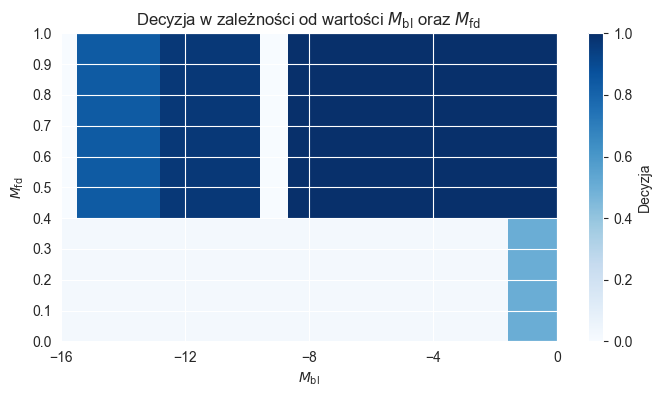

In [4]:
import numpy as np
import matplotlib.pyplot as plt

maxMbl = 0
minMbl = -16

maxMfd = 1.0
minMfd = 0.0

przedzialy = [
    # [(Mfd_min, Mfd_max), (Mbl_min, Mbl_max), decyzja]
    [(0.511, 0.521), (-8.608, maxMbl), 0.25],
    [(0.508, 0.511), (-8.608, maxMbl), 0.0],
    [(0.490, 0.508), (-8.608, maxMbl), 1.0],
    [(0.521, maxMfd), (-8.608, maxMbl), 1.0],
    [(0.490, maxMfd), (-9.565, -8.608), 0.0],
    [(0.490, maxMfd), (-12.785, -9.565), 0.968],
    [(0.490, maxMfd), (-15.492, -12.785), 0.833],
    [(0.490, maxMfd), (minMbl, -15.492), 0.0],
    [(0.458, 0.468), (-3.122, maxMbl), 0.5],
    [(0.458, 0.468), (-4.277, -3.122), 0.0],
    [(0.458, 0.468), (minMbl, -4.277), 1.0],
    [(0.468, 0.490), (minMbl, maxMbl), 0.0],
    [(minMfd, 0.458), (-1.502, maxMbl), 0.5],
    [(minMfd, 0.458), (minMbl, -1.502), 0.023],
]

# Inicjujemy macierz decyzji jako pustą tablicę 2D
decision_matrix = np.zeros((abs(int(minMfd - maxMfd) * 10), abs(int(minMbl - maxMbl) * 10)))

# Przetwarzamy przedziały danych
for interval in przedzialy:
    # Pobieramy granice przedziałów Mfd i Mbl
    Mfd_min, Mfd_max = interval[0]
    Mbl_min, Mbl_max = interval[1]
    decision = interval[2]

    # Mapujemy granice przedziałów na indeksy macierzy decyzji
    Mfd_start = int((Mfd_min - minMfd) * 10)
    Mfd_end = int((Mfd_max - minMfd) * 10)
    Mbl_start = int((Mbl_min - minMbl) * 10)
    Mbl_end = int((Mbl_max - minMbl) * 10)

    # Ustawiamy decyzję w odpowiednich miejscach macierzy
    decision_matrix[Mfd_start:Mfd_end, Mbl_start:Mbl_end] = decision

# Tworzymy hitmapę
plt.figure(figsize=(8, 4))
plt.yticks(np.arange(minMfd, maxMfd + 0.1, 0.1))
plt.xticks(np.arange(minMbl, maxMbl + 1, 4))

plt.imshow(decision_matrix, cmap='Blues', extent=(minMbl, maxMbl, maxMfd, minMfd), vmin=0, vmax=1)
plt.colorbar(label='Decyzja')
plt.xlabel('$M_{\mathrm{bl}}$')
plt.ylabel('$M_{\mathrm{fd}}$')
plt.title('Decyzja w zależności od wartości $M_{\mathrm{bl}}$ oraz $M_{\mathrm{fd}}$')
plt.xlim(minMbl, maxMbl)
plt.ylim(minMfd, maxMfd)

plt.gca().set_aspect("auto")

# plt.gca().invert_yaxis()
plt.show()